In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/CarPrice_Assignment.csv
/kaggle/input/car-prices/Data Dictionary - carprices.xlsx


In [2]:
dataset= pd.read_csv('/kaggle/input/car-prices/CarPrice_Assignment.csv',index_col='car_ID')
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
#changing the categorical columns to numerical columns in the dataset
categorical_columns = dataset.select_dtypes(object).columns
categorical_columns_list = categorical_columns.tolist()
categorical_columns_list.insert(0, 'symboling')
categorical_columns = pd.Index(categorical_columns_list)


for column in categorical_columns:
    mean_target = dataset.groupby(column)['price'].transform('mean')
    dataset[column] = mean_target
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,17221.296296,13495.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,13495.0
2,17221.296296,16500.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,16500.0
3,10037.907407,16500.0,12999.7982,12611.270833,12989.924078,10376.652386,19910.809211,12961.097361,94.5,171.2,...,152,17754.60284,2.68,3.47,9.0,154,5000,19,26,16500.0
4,10109.281250,13950.0,12999.7982,12611.270833,13501.152174,14344.270833,9239.308333,12961.097361,99.8,176.6,...,109,17754.60284,3.19,3.40,10.0,102,5500,24,30,13950.0
5,10109.281250,17580.0,12999.7982,12611.270833,13501.152174,14344.270833,11087.463000,12961.097361,99.4,176.6,...,136,17754.60284,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,17330.681818,14892.5,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,9.5,114,5400,23,28,16845.0
202,17330.681818,16230.0,12999.7982,16298.166676,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,8.7,160,5300,19,25,19045.0
203,17330.681818,18735.0,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,173,17754.60284,3.58,2.87,8.8,134,5500,18,23,21485.0


In [4]:
#dropping carname
dataset=dataset.drop(['CarName'],axis=1)

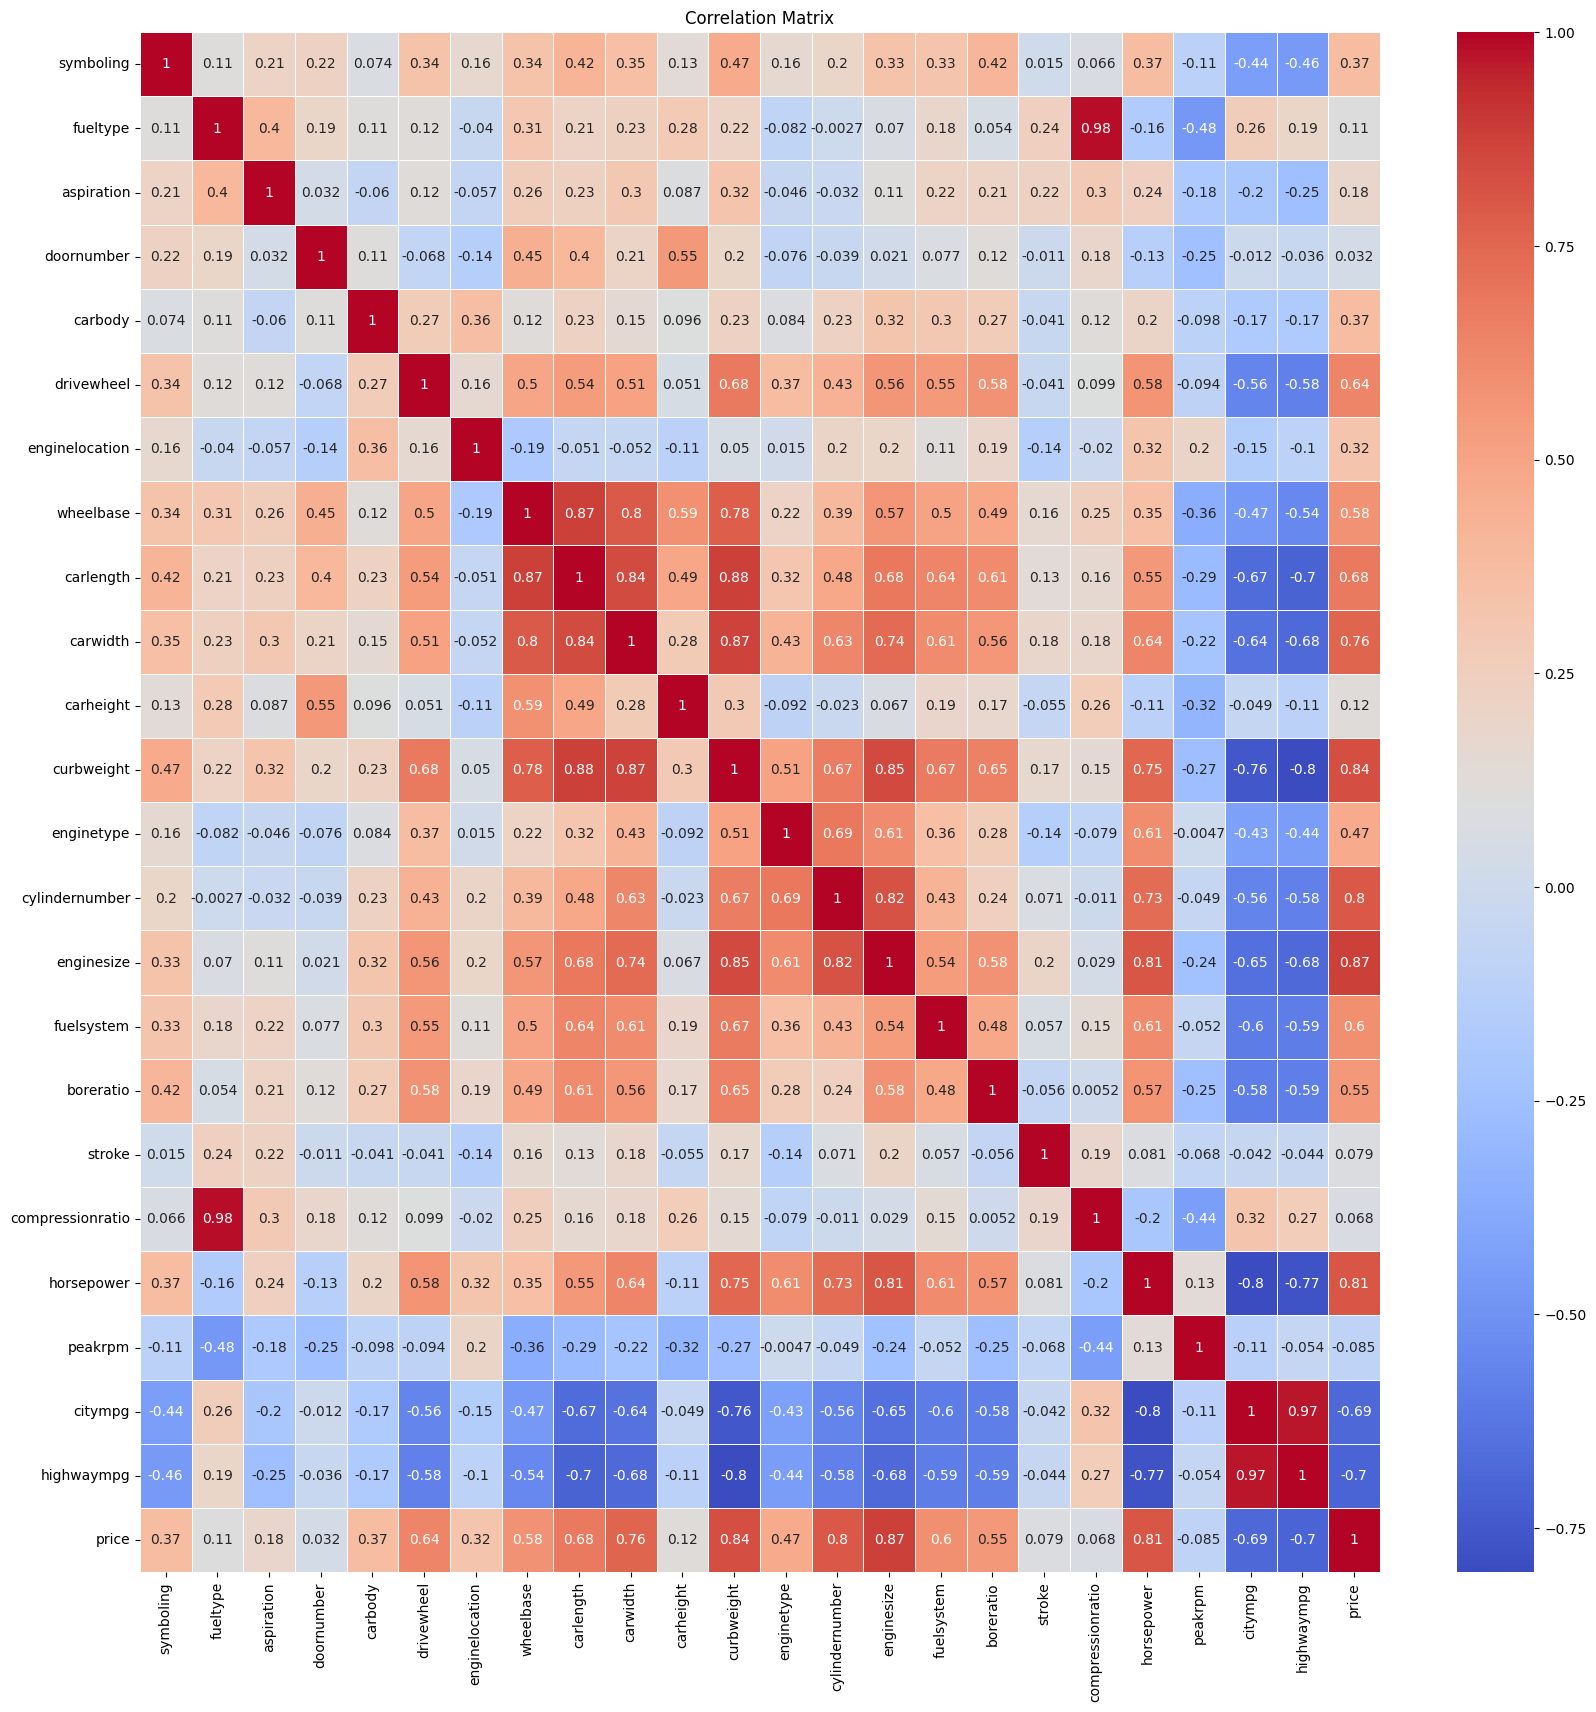

In [5]:
#making the correlation matrix to figure out which features to drop
c_mat=dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(c_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
#Dropping columns of less significance (between 0.3 and -0.3)
dataset=dataset.drop(['fueltype','aspiration','carheight','stroke','compressionratio','peakrpm'],axis=1)

In [7]:
#Creating independent and dependent vectors
X=dataset.drop("price", axis=1)
y=dataset.price
X=X.to_numpy()
y=y.to_numpy()

In [8]:
#Mean normalisation and feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean)
X=X/X_std 

In [9]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [10]:
#Defining model
def predict(features,weights,bias):
    predictions=np.dot(features,weights)+bias
    predictions = np.round(predictions, 2)
    return predictions

In [11]:
#Defining the gradient descent and returning cost history for Epoch graph
def grad(X,y,W,b,n,lr,thresh):
    prev_cost = float('inf')
    cost_hist=[]
    
    while True:
        preds=predict(X,W,b)
        err = preds - y

        dW = 1/n* np.dot(X.T, err)
        db = 1/n*np.sum(err)

        W-=lr*dW
        b-=lr*db
        cost =(1/(2*n))*np.sum(err ** 2)
        cost_hist.append(cost)
        if (abs(prev_cost - cost)<thresh):
            break
        prev_cost = cost
    return W,b,cost_hist


In [12]:
#Defining R^2
def score(y, preds):
    y_mean = np.mean(y)
    tss = np.sum((y-y_mean) ** 2)
    rss = np.sum((y-preds) ** 2)
    score = 1-(rss/tss)
    return score

R2 score:0.9262576773384303


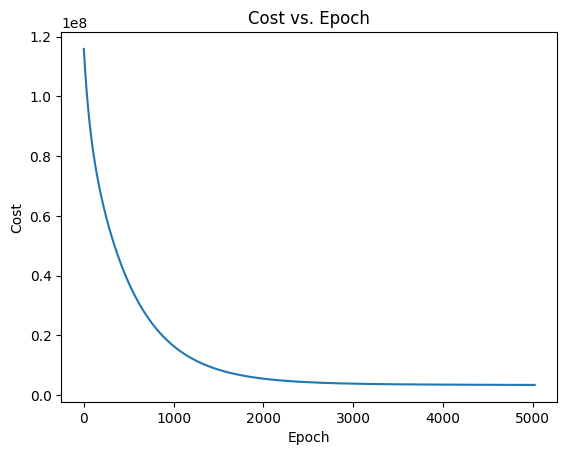

In [13]:
#Setting the init values and plotting Cost vs Epoch vs predicted value graph
lr=0.001
thresh=60
n,col = X_train.shape
W = np.zeros(col)
b= 0

W,b,cost_hist=grad(X_train,y_train,W,b,n,lr,thresh)
res=predict(X_test,W,b)
print(f"R2 score:{score(y_test,res)}")

plt.plot(range(len(cost_hist)),cost_hist)
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [14]:
print("Percentage accuracy is: ",(score(y_test,res))*100,"%")

Percentage accuracy is:  92.62576773384303 %
